## An example of running CBP-SMF on the mRNA and miRNA data of breast cancer
1. Read original data provided by user.
2. Establish CBP_SMF_Solver and multi-run CBP-SMF algorithm.    
3. Display cost function and result matrices.
4. Predict unlabeled samples' label and extract each module's members.
5. *CBP_SMF_Solver can provide users **recommendation** if the rank of latent matrix and the parameters(beta,omega) are **not decided**.*

### 1. Read BRCA's mRNA and miRNA matrix, samples' subtype annotation, labeled samples' correlation matrix.
   * **Note** that the order of samples in above three data must be same, and put labeled samples in front of unlabeled samples.

In [1]:
%matplotlib inline
import CBP_SMF
import pandas as pd

In [2]:
X1_test_df = pd.read_csv('data\\final2_genematrix.csv', index_col='Keys')
X2_test_df = pd.read_csv('data\\final_miRNAmatrix_hsa.csv', index_col='sample')
corr_test_df = pd.read_csv('data\\final_corrmatrix.csv', index_col='Unnamed: 0')

In [3]:
X1_test = X1_test_df.as_matrix()
X2_test = X2_test_df.as_matrix()
corr_test = corr_test_df.as_matrix()

X1_feature = list(X1_test_df.index)
X2_feature = list(X2_test_df.index)

In [4]:
annotation = pd.read_csv('data\\final_annotation.csv').set_index('Unnamed: 0')
subtype = annotation.pop("subtype")
subtype_color = {'Luminal A': 'r', 'Luminal B': 'b',
                 'Basal like': 'g', 'HER2 enriched': 'y', 'Normal like': 'k'}
col_color = subtype.map(subtype_color)

In [5]:
X1_test = CBP_SMF.normalization(X1_test)
X2_test = CBP_SMF.normalization(X2_test)
X_input = [X1_test, X2_test]

In [6]:
labeled_count = CBP_SMF.subtype_information(subtype)
labeled_sample_list = X1_test_df.columns[0:labeled_count[-1]]
unlabeled_sample_list = X1_test_df.columns[labeled_count[-1]:]

### 2. Establish CBP_SMF_Solver and pass parameters.

In [7]:
CBP_SMF_obj = CBP_SMF.CBP_SMF_Solver(X_input=X_input, rank=4, n_iter=50, beta=10, omega=100000,
                                     corr_matrix=corr_test, labeled_count=labeled_count, subgroup=subtype,
                                     multi_runtimes=10, consensus_runtimes=10,
                                     labeled_sample_list=labeled_sample_list, unlabeled_sample_list=unlabeled_sample_list,
                                     z_threshold=2.0, col_color=col_color)

#### Arguments of CBP_SMF_Solver  
**X_input** (List): List of input Xi matrices.  
**rank** (int): the rank of latent matrix. 
**n_iter** (int): Number of iteration in each run.  
**beta** (int / float): Representation of the importance of semi-supervised part.  
**omega** (int / float):   Representation of the importance of weight part.  
**corr_matrix** (Matrix): Correlation matrix of labeled samples.   
**labeled_count** (List): Count of each subtype's samples.   
**subgroup** (Series): Subtype of each labeled sample.  
**multi_runtimes** (int): Times of run NMF to get best solution.  
**consensus_runtimes** (int): Times of run NMF to implement consensus clustering.  
**labeled_sample_list** (List): Labeled samples' name.  
**unlabeled_sample_list** (List):  Unlabeled samples' name.  
**z_threshold** (float): Threshold to get each module's members.  
**col_color** (Dict): Mapping of subtype to colors when displaying results.  

In [8]:
cost_min, U_min, W_min, V_min, PI_min, purity_list, ARI_list, NMI_list = CBP_SMF_obj.multirun()

runtimes:[ 1 /10]
optimize done
runtimes:[ 2 /10]
Error: incorrect cluster number!
runtimes:[ 3 /10]
optimize done
runtimes:[ 4 /10]
optimize done
runtimes:[ 5 /10]
runtimes:[ 6 /10]
runtimes:[ 7 /10]
runtimes:[ 8 /10]
runtimes:[ 9 /10]
runtimes:[ 10 /10]


### 3. Display results through clustering metrics and several plots.

- **Metrics**
  - Purity.
  - ARI.
  - NMI.
- **Plots**
  - Cost of CBP-SMF through optimization.
  - Clustermap of Vl (labeled parts of V) matrix .
  - Each module's line plot and boxplot in Vl  matrix.

Purity:
0.865921787709
ARI:
0.84719602208
NMI:
0.85983031072


C:\Users\wang\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


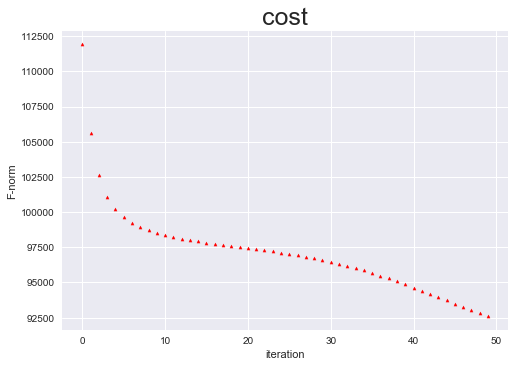

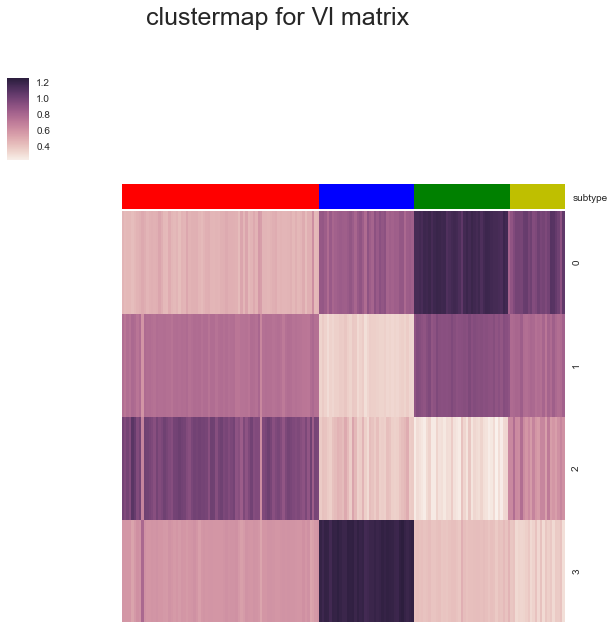

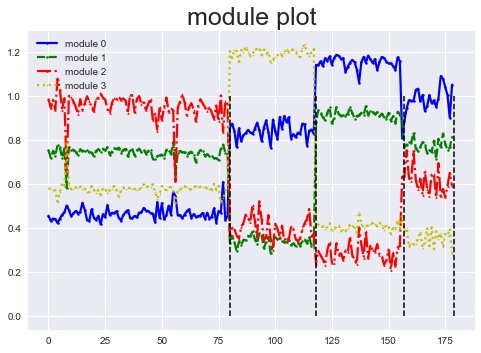

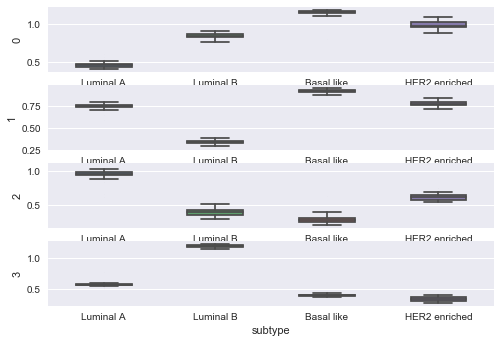

In [9]:
CBP_SMF_obj.display_analysis(V_min, cost_min)

### 4. Predict label of unlabeled samples and extract each subtype's corresponding heterogeneous module.

In [10]:
prediction_result = CBP_SMF_obj.predict_subtype(V_min)

In [11]:
prediction_result

{'TCGA-3C-AAAU-01': 'Luminal B',
 'TCGA-3C-AALI-01': 'Luminal B',
 'TCGA-3C-AALJ-01': 'Luminal A',
 'TCGA-3C-AALK-01': 'Luminal A',
 'TCGA-4H-AAAK-01': 'Luminal A',
 'TCGA-5L-AAT0-01': 'Luminal A',
 'TCGA-5T-A9QA-01': 'Basal like',
 'TCGA-A1-A0SB-01': 'Luminal A',
 'TCGA-A1-A0SF-01': 'Luminal A',
 'TCGA-A1-A0SG-01': 'Luminal B',
 'TCGA-A1-A0SI-01': 'Luminal A',
 'TCGA-A1-A0SN-01': 'Luminal B',
 'TCGA-A1-A0SQ-01': 'Luminal B',
 'TCGA-A2-A0CK-01': 'Luminal A',
 'TCGA-A2-A0CO-01': 'Luminal A',
 'TCGA-A2-A0CR-01': 'Luminal A',
 'TCGA-A2-A0EP-01': 'Luminal A',
 'TCGA-A2-A1FV-01': 'Luminal A',
 'TCGA-A2-A1FW-01': 'Basal like',
 'TCGA-A2-A1FX-01': 'Luminal B',
 'TCGA-A2-A1FZ-01': 'Luminal A',
 'TCGA-A2-A1G0-01': 'Luminal A',
 'TCGA-A2-A1G1-01': 'Basal like',
 'TCGA-A2-A1G4-01': 'Luminal B',
 'TCGA-A2-A1G6-01': 'Luminal A',
 'TCGA-A2-A259-01': 'Luminal A',
 'TCGA-A2-A25A-01': 'Luminal A',
 'TCGA-A2-A25B-01': 'Basal like',
 'TCGA-A2-A25C-01': 'Basal like',
 'TCGA-A2-A25D-01': 'Luminal A',
 'TCG

In [12]:
import csv
with open('result\\prediction_result.csv', 'wb',) as csvfile:
    writer = csv.writer(csvfile)
    for key, value in prediction_result.items():
        writer.writerow([key, value])

In [13]:
CBP_SMF_obj.subtype_module_correspond(V_min)
module_from_X1 = CBP_SMF_obj.getmodulegene(X1_feature, U_min[0])
module_from_X2 = CBP_SMF_obj.getmodulegene(X2_feature, U_min[1])

Corresponding relationship between module and subtype are:
module:0 corresponds to subtype:Basal like
module:1 corresponds to subtype:Luminal A
module:2 corresponds to subtype:Luminal A
module:3 corresponds to subtype:Luminal B


In [14]:
with open('result\\module_X1.csv', 'wb',) as csvfile:
    writer = csv.writer(csvfile)
    for row in module_from_X1:
        writer.writerow(row)

with open('result\\module_X2.csv', 'wb',) as csvfile:
    writer = csv.writer(csvfile)
    for row in module_from_X2:
        writer.writerow(row)

In [15]:
module_from_X1

[['GPSM2',
  'NEK2',
  'PBK',
  'DCAF13',
  'NCAPH',
  'ARRDC3',
  'CTPS1',
  'PLK1',
  'GTSE1',
  'ASPM',
  'PAQR4',
  'CDC20',
  'KIF4A',
  'PRR11',
  'PLK4',
  'MKI67',
  'MAD2L1',
  'CALR',
  'CDC7',
  'FANCI',
  'H2AFJ',
  'KIF11',
  'EZH2',
  'DTL',
  'CDCA5',
  'GINS1',
  'HMMR',
  'TROAP',
  'ANXA1',
  'PTTG1',
  'KRT8',
  'SLC27A4',
  'CKAP2L',
  'MCAM',
  'RETSAT',
  'ARHGAP11A',
  'CBX2',
  'BIRC5',
  'FADS2',
  'SAPCD2',
  'UBE2S',
  'CCT3',
  'STIL',
  'HMGB2',
  'DLGAP5',
  'TTK',
  'FAM83D',
  'SKA1',
  'CENPA',
  'CHEK1',
  'CDC6',
  'NDC80',
  'SPC24',
  'SFXN1',
  'DBF4',
  'ISYNA1',
  'FAM111B',
  'RRM2',
  'RAD51AP1',
  'MANF',
  'HJURP',
  'KIF2C',
  'RECQL4',
  'CCNA2',
  'TRIP13',
  'EXO1',
  'ANLN',
  'CENPN',
  'CABLES2',
  'MELK',
  'FOXM1',
  'AURKA',
  'ECT2',
  'CENPU',
  'CDT1',
  'CCNB2',
  'LSM4',
  'KIAA1524',
  'ATAD2',
  'CDK1',
  'GINS2',
  'PIMREG',
  'CKAP2',
  'CDCA8',
  'CDCA7',
  'SKA3',
  'BUB1',
  'KIF20A',
  'SHCBP1',
  'MCM10',
  'SLC39A6',


### 5. Provide users **recommendation** of rank k,beta and omega.  
* CBP_SMF performs a consensus clustering to determine k through calculating cophenetic coefficient.
* CBP_SMF recommend beta and omega through relative size of norm.

In [15]:
CBP_SMF_obj.parameter_recommendation()

CBP_SMF recommendation of beta : 9.2240 (±50%)
CBP_SMF recommendation of gamma: 100000 (±50%)


##### We recommend users to select rank of highest cophenetic coefficient, in our example(plot below), rank=4 or 5 is the best solution.

running rank: 2
running rank: 3
running rank: 4
running rank: 5
running rank: 6
running rank: 7


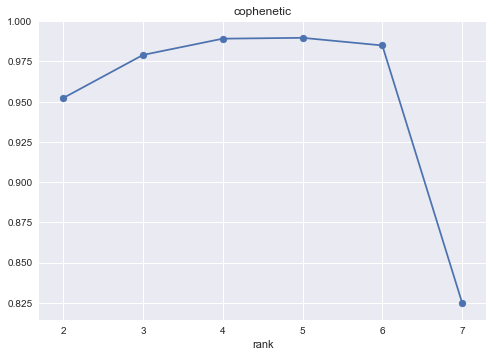

In [16]:
cophenet = CBP_SMF_obj.cophenetic(rank_start=2, rank_end=7)